# Introduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Gathering

In [4]:
# Reading the match data from the csv file
match = pd.read_csv(r'C:\Users\srini\Projects\IPL\matches.csv')
match.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [5]:
# Reading the data for each ball 
ball= pd.read_csv(r'C:\Users\srini\Projects\IPL\deliveries.csv')
ball.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


Gathering data for captaincy

# Data Wrangling

### Missing Values

In [59]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 106.4+ KB


So there are total 756 matches with 752 decided winners. Let us see which rows do not have any decided winner.

In [63]:
match[match.isna()['winner']]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


So these matches were probably washed from the rains and did not have any results declared.

In [64]:
ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 22 columns):
match_id            179078 non-null int64
inning              179078 non-null int64
batting_team        179078 non-null object
bowling_team        179078 non-null object
over                179078 non-null int64
ball                179078 non-null int64
batsman             179078 non-null object
non_striker         179078 non-null object
bowler              179078 non-null object
is_super_over       179078 non-null int64
wide_runs           179078 non-null int64
bye_runs            179078 non-null int64
legbye_runs         179078 non-null int64
noball_runs         179078 non-null int64
penalty_runs        179078 non-null int64
batsman_runs        179078 non-null int64
extra_runs          179078 non-null int64
total_runs          179078 non-null int64
player_dismissed    8834 non-null object
dismissal_kind      8834 non-null object
fielder             6448 non-null object
over_

This dataframe has missing values only for player dismissed and dismissal_kind. <br>

The data type for all the columns also seem to be okay.

### Duplicate values

In [66]:
match.duplicated().sum()

0

In [67]:
ball.duplicated().sum()

23

In [72]:
ball[ball.duplicated()].head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,over_ball
52178,221,1,Mumbai Indians,Delhi Daredevils,4,1,SR Tendulkar,C Madan,PJ Sangwan,0,...,0,0,0,1,0,1,NaN,NaN,NaN,4.1
162805,7946,1,Rajasthan Royals,Royal Challengers Bangalore,4,4,AM Rahane,RA Tripathi,UT Yadav,0,...,0,0,0,4,0,4,NaN,NaN,NaN,4.4
162806,7946,1,Rajasthan Royals,Royal Challengers Bangalore,4,5,AM Rahane,RA Tripathi,UT Yadav,0,...,0,0,0,1,0,1,NaN,NaN,NaN,4.5
162870,7946,1,Rajasthan Royals,Royal Challengers Bangalore,13,5,RA Tripathi,AM Rahane,YS Chahal,0,...,0,0,0,0,0,0,NaN,NaN,NaN,13.5
162964,7946,2,Royal Challengers Bangalore,Rajasthan Royals,10,1,AB de Villiers,Mandeep Singh,I Sodhi,0,...,0,0,0,0,0,0,NaN,NaN,NaN,10.1


In [73]:
ball.query('match_id==221 & inning==1 & over==4 & ball==1')

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,over_ball
52169,221,1,Mumbai Indians,Delhi Daredevils,4,1,SR Tendulkar,C Madan,PJ Sangwan,0,...,0,0,0,1,0,1,NaN,NaN,NaN,4.1
52178,221,1,Mumbai Indians,Delhi Daredevils,4,1,SR Tendulkar,C Madan,PJ Sangwan,0,...,0,0,0,1,0,1,NaN,NaN,NaN,4.1


So these duplicate values need to be removed as they dont add any value.

In [74]:
ball.drop_duplicates(inplace= True)

### Renaming Franchise team names
Some teams like Deccan Chargers/ Sunrisers Hyderabad can be grouped together as they were the same teams.

In [269]:
# Replacing Franchise names
ball.replace({'Sunrisers Hyderabad':'Hyderabad (Sunriser/Chargers)','Deccan Chargers':'Hyderabad (Sunriser/Chargers)',\
'Rising Pune Supergiants':'Pune (Supergiant/ Warriors)','Delhi Daredevils':'Delhi (Capitals/ Daredevils)',\
'Delhi Capitals':'Delhi (Capitals/ Daredevils)','Pune Warriors':'Pune (Supergiant/ Warriors)',
'Rising Pune Supergiant':'Pune (Supergiant/ Warriors)'}, inplace= True)

In [274]:
ball.batting_team.unique()

array(['Hyderabad (Sunriser/Chargers)', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Pune (Supergiant/ Warriors)', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Delhi (Capitals/ Daredevils)', 'Chennai Super Kings',
       'Rajasthan Royals', 'Kochi Tuskers Kerala'], dtype=object)

In [364]:
match.replace({'Sunrisers Hyderabad':'Hyderabad (Sunriser/Chargers)','Deccan Chargers':'Hyderabad (Sunriser/Chargers)',\
'Rising Pune Supergiants':'Pune (Supergiant/ Warriors)','Delhi Daredevils':'Delhi (Capitals/ Daredevils)',\
'Delhi Capitals':'Delhi (Capitals/ Daredevils)','Pune Warriors':'Pune (Supergiant/ Warriors)',
'Rising Pune Supergiant':'Pune (Supergiant/ Warriors)'}, inplace= True)

In [366]:
match.team2.nunique()

11

### Creating summary dataframes from ball dataframe

In [275]:
# Creating a new df summarizing total runs and wickets that fell in each innings

summary= ball.groupby(by=['match_id','inning','batting_team']).sum()['total_runs'].reset_index()
temp = ball.groupby(by=['match_id','inning','batting_team']).count()['player_dismissed'].reset_index()

summary= pd.merge(summary, temp,how='outer', on= ['match_id','inning', 'batting_team'])

In [276]:
# Creating a new column combining the over and the ball bowled
ball['over_ball']= ball['over']+ball['ball']/10

In [277]:
# Merging the total balls used in the innings with the summary data
temp= ball.groupby(by=['match_id','inning','batting_team']).max()['over_ball'].reset_index()

summary= pd.merge(summary, temp,how='outer', on= ['match_id','inning', 'batting_team'])
summary.head(2)

,match_id,inning,batting_team,total_runs,player_dismissed,over_ball
0,1,1,Hyderabad (Sunriser/Chargers),207,4,20.6
1,1,2,Royal Challengers Bangalore,172,10,20.4


In [340]:
# Changing the matrix into a long format
s1 = summary.melt(id_vars=['match_id','inning',]).query('variable=="total_runs" & inning==1')[['match_id','value']]
s2 =summary.melt(id_vars=['match_id','inning',]).query('variable=="total_runs" & inning==2')[['match_id','value']]
temp= pd.merge(s1, s2, on='match_id', how='inner')

s1= summary.melt(id_vars=['match_id','inning',]).query('variable=="over_ball" & inning==1')[['match_id','value']]
s2=summary.melt(id_vars=['match_id','inning',]).query('variable=="over_ball" & inning==2')[['match_id','value']]
temp2= pd.merge(s1,s2,on='match_id', how='inner')

s1= summary.melt(id_vars=['match_id','inning',]).query('variable=="player_dismissed" & inning==1')[['match_id','value']]
s2=summary.melt(id_vars=['match_id','inning',]).query('variable=="player_dismissed" & inning==2')[['match_id','value']]
temp3 = pd.merge(s1,s2,on='match_id', how='inner')

summary = pd.merge(pd.merge(temp,temp2, on= 'match_id', how='inner'), temp3, on='match_id', how='inner')

summary.rename(columns={'value_x_x':'runs_1', 'value_y_x':'runs_2','value_x_y':'overs_1','value_y_y':'overs_2',\
    'value_x':'wickets_1', 'value_y':'wickets_2'}, inplace= True)
summary.head()

,match_id,runs_1,runs_2,overs_1,overs_2,wickets_1,wickets_2
0,1,207,172,20.6,20.4,4,10
1,2,184,187,20.7,20.5,8,3
2,3,183,184,20.6,15.7,4,0
3,4,163,164,20.6,19.7,6,4
4,5,157,142,20.6,20.6,8,9


In [342]:
# Merging the summary data with match info data
match= pd.merge(match, summary, right_on= 'match_id', left_on= 'id', how='left')

### Droppping umpire information as it is not essential for our analysis

In [344]:
match.drop(columns=['umpire1', 'umpire2', 'umpire3'], inplace= True)

In [345]:
match.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,win_by_wickets,player_of_match,venue,match_id,runs_1,runs_2,overs_1,overs_2,wickets_1,wickets_2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",1.0,207,172,20.6,20.4,4,10
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,...,7,SPD Smith,Maharashtra Cricket Association Stadium,2.0,184,187,20.7,20.5,8,3


### Creating a batsman summary dataframe

In [278]:
# Total runs scored by each batsman
batsman= ball.groupby(by='batsman').sum()['batsman_runs'].reset_index()

#Total balls played by each batsman
temp = ball.groupby(by='batsman').count()['ball']
batsman= pd.merge(batsman, temp, how='outer',on='batsman')

# Total 4s hit
temp = ball.query('batsman_runs==4').groupby(by='batsman').count()['batsman_runs'].reset_index()
batsman = pd.merge(batsman, temp, how='outer',on='batsman')

#Total 6s hit
temp= ball.query('batsman_runs==6').groupby(by='batsman').count()['batsman_runs'].reset_index()
batsman = pd.merge(batsman, temp, how='outer',on='batsman')

batsman.rename(columns={'batsman_runs_x':'total_runs','batsman_runs_y':'4s', 'batsman_runs':'6s'}, inplace= True)
batsman.head(3)

,batsman,total_runs,ball,4s,6s
0,A Ashish Reddy,280,196,16.0,15.0
1,A Chandila,4,7,NaN,NaN
2,A Chopra,53,75,7.0,NaN


In [279]:
# Calculating the strike rate
batsman['strike_rate']= (batsman.total_runs/ batsman.ball)*100
batsman.head(2)

,batsman,total_runs,ball,4s,6s,strike_rate
0,A Ashish Reddy,280,196,16.0,15.0,142.857143
1,A Chandila,4,7,NaN,NaN,57.142857


In [280]:
# Calculating percent of the runs scored by boundries
batsman['boundary_percent']= (batsman['4s']*4+ batsman['6s']*6)/ batsman.total_runs
batsman.head(1)

,batsman,total_runs,ball,4s,6s,strike_rate,boundary_percent
0,A Ashish Reddy,280,196,16.0,15.0,142.857143,0.55


In [281]:
# Calculating the runs scored by openers in each match
#calculating the runs scored by each batsman in each match
a= ball.groupby(by=['match_id','batsman']).sum()['batsman_runs']
b= ball.groupby(by=['match_id','batsman']).count()['total_runs']
opening = pd.DataFrame(data=[a,b]).transpose().reset_index()

# finding which batsmen opened
opening2= ball.query('over==1 & ball==1')[['match_id','batsman','non_striker']].melt(id_vars='match_id')
opening = pd.merge(opening, opening2, how='right',left_on =['match_id','batsman'], right_on=['match_id','value'])

#renaming columns
opening.rename(columns={'total_runs':'opening_balls', 'batsman_runs':'opening_runs'}, inplace= True)
#dropping redundant columns
opening.drop(columns=['variable','value'], inplace= True)
opening.head()

,match_id,batsman,opening_runs,opening_balls
0,1,CH Gayle,32.0,23.0
1,1,DA Warner,14.0,9.0
2,1,Mandeep Singh,24.0,16.0
3,1,S Dhawan,40.0,31.0
4,2,AM Rahane,60.0,34.0


In [282]:
# Aggregating the runs scored by openers
opening= opening.groupby(by='batsman').sum()[['opening_runs','opening_balls']].reset_index()

batsman= pd.merge(batsman, opening, on='batsman', how='left')
batsman.head(3)

,batsman,total_runs,ball,4s,6s,strike_rate,boundary_percent,opening_runs,opening_balls
0,A Ashish Reddy,280,196,16.0,15.0,142.857143,0.55,NaN,NaN
1,A Chandila,4,7,NaN,NaN,57.142857,NaN,NaN,NaN
2,A Chopra,53,75,7.0,NaN,70.666667,NaN,40.0,52.0


### Creating a bowler summary dataframe

In [283]:
ball.dismissal_kind.value_counts()

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

For calculating the wickets picked by the bowler we need to exclude the run outs, retired hurt and obstructing the field. There are actually 2 dismissals for obstructing the field!!! <br>

A quick Google search reveals that they were probable runouts but the batsmen (Yusuf Pathan and Amit Mishra) blocked the ball from hitting the stumps and hence were declared out.

In [284]:
ball.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,over_ball
0,1,1,Hyderabad (Sunriser/Chargers),Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,1.1
1,1,1,Hyderabad (Sunriser/Chargers),Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,1.2


In [285]:
# Total balls bowled and total runs given by the bowler
bowler= ball.groupby(by='bowler').count()['ball'].reset_index()
temp= ball.groupby(by='bowler').sum()['total_runs']

bowler= pd.merge(bowler, temp, on='bowler', how='outer')

In [286]:
# Filtering the runouts/ retired hurts
temp = ball.query('dismissal_kind!="obstructing the field" & dismissal_kind !="retired hurt" & dismissal_kind != "run out"')

# Filtering the wickets taken
temp = temp[~temp.isna().dismissal_kind][['bowler','dismissal_kind']]
temp= temp.groupby(by=['bowler']).count().reset_index()

bowler= pd.merge(bowler, temp, on='bowler', how='outer')

In [287]:
# Renaming the column to reflect the wickets
bowler.rename(columns={'dismissal_kind':'wickets_taken'}, inplace= True)

In [288]:
# Calculating the total dot balls
temp = ball.query('total_runs==0').groupby(by='bowler').count()['ball'].reset_index()
bowler= pd.merge(bowler, temp, on='bowler', how='outer')

In [289]:
# Renaming the column to reflect the wickets
bowler.rename(columns={'ball_x':'balls_bowled', 'ball_y':'dot_balls'}, inplace= True)
bowler.head(1)

,bowler,balls_bowled,total_runs,wickets_taken,dot_balls
0,A Ashish Reddy,270,400,18.0,79.0


In [290]:
# Calculating the number of bowled and LBWs taken by the bowler
temp =ball.query('dismissal_kind=="bowled" | dismissal_kind =="lbw" ').groupby(by='bowler').count()['dismissal_kind'].reset_index()
bowler= pd.merge(bowler, temp, on='bowler', how='outer')
bowler.head(3)

,bowler,balls_bowled,total_runs,wickets_taken,dot_balls,dismissal_kind
0,A Ashish Reddy,270,400,18.0,79.0,9.0
1,A Chandila,234,245,11.0,103.0,NaN
2,A Choudhary,108,144,5.0,42.0,NaN


In [291]:
# Renaming the column to reflect the wickets
bowler.rename(columns={'dismissal_kind':'bowl_or_lbw'}, inplace= True)

In [292]:
bowler.head(1)

,bowler,balls_bowled,total_runs,wickets_taken,dot_balls,bowl_or_lbw
0,A Ashish Reddy,270,400,18.0,79.0,9.0


In [293]:
# Calculating the bowler economy
bowler['economy']= bowler.total_runs/ (bowler.balls_bowled/6)

In [294]:
# Calculating dot ball percent
bowler['dot_ball_percent']= bowler.dot_balls/bowler.balls_bowled

In [295]:
# Calculating the runs scored in last 3 overs (death over) to compare the bowlers performance
a= ball.query('over>=18').groupby('bowler').sum()['total_runs']
b= ball.query('over>=18').groupby('bowler').count()['batsman_runs']
temp =pd.DataFrame(data=[a,b] ).transpose().reset_index()
temp.rename(columns={'total_runs':'death_runs','batsman_runs':'death_balls' }, inplace= True)

bowler= pd.merge(bowler, temp, on='bowler', how='outer')
bowler.head(3)

,bowler,balls_bowled,total_runs,wickets_taken,dot_balls,bowl_or_lbw,economy,dot_ball_percent,death_runs,death_balls
0,A Ashish Reddy,270,400,18.0,79.0,9.0,8.888889,0.292593,73.0,38.0
1,A Chandila,234,245,11.0,103.0,NaN,6.282051,0.440171,NaN,NaN
2,A Choudhary,108,144,5.0,42.0,NaN,8.000000,0.388889,29.0,21.0


In [296]:
# Calculating bowling economy in death over
bowler['death_econ']= bowler.death_runs/ (bowler.death_balls/6)

In [297]:
# Calculating the percentage of bowled and LBWs by the bowler among the wickets they took
bowler['bowl_lbw_percent']= bowler.bowl_or_lbw/ bowler.wickets_taken

In [298]:
bowler.head(1)

,bowler,balls_bowled,total_runs,wickets_taken,dot_balls,bowl_or_lbw,economy,dot_ball_percent,death_runs,death_balls,death_econ,bowl_lbw_percent
0,A Ashish Reddy,270,400,18.0,79.0,9.0,8.888889,0.292593,73.0,38.0,11.526316,0.5


### Team inning summary
To calculate over wise run scoring for each team

In [299]:
# Total innings played for each over bowled
overs_played= ball[['batting_team','over','match_id']].drop_duplicates().groupby(by=['batting_team','over']).count()['match_id'].reset_index()

In [300]:
# Total runs scored in each over
over_runs= ball.groupby(by=['batting_team','over']).sum()['total_runs'].reset_index()
over_runs= pd.merge(over_runs, overs_played, on=['batting_team','over'], how='outer')

over_runs.rename(columns={'match_id':'matches'}, inplace= True)

In [301]:
# Calculating average runs scored in each over
over_runs['avg']= over_runs.total_runs/ over_runs.matches

In [302]:
over_runs.head()

,batting_team,over,total_runs,matches,avg
0,Chennai Super Kings,1,870,164,5.304878
1,Chennai Super Kings,2,1116,164,6.804878
2,Chennai Super Kings,3,1293,164,7.884146
3,Chennai Super Kings,4,1354,164,8.256098
4,Chennai Super Kings,5,1423,164,8.676829


# Exploratory Data Analysis

### Average runs scored in each over

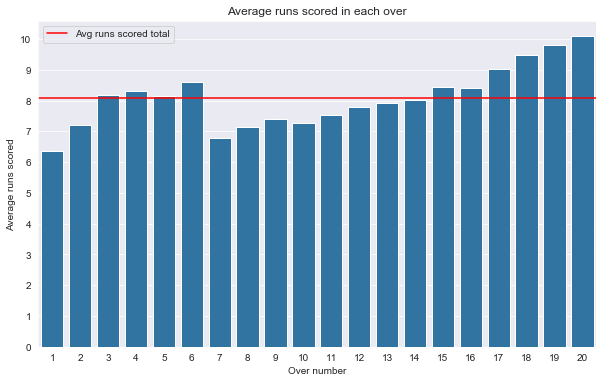

In [463]:
# Plotting average runs scored in each over in IPL
series= over_runs.groupby(by='over').mean()['avg']
sns.set_style('darkgrid')

plt.figure(figsize=(10,6))
sns.barplot(x=series.index, y=series, color='tab:blue', )
plt.axhline(over_runs.avg.mean(), color='r', label= 'Avg runs scored total')
plt.title('Average runs scored in each over')
plt.ylabel('Average runs scored')
plt.xlabel('Over number')
plt.yticks(np.arange(0,11))
plt.legend()
plt.show()

### Average runs scored per over team wise

In [475]:
color_code= {'Chennai Super Kings':'y','Delhi (Capitals/ Daredevils)':'b','Hyderabad (Sunriser/Chargers)':'tab:orange',\
  'Kings XI Punjab':'r', 'Kolkata Knight Riders':'k','Mumbai Indians':'tab:blue','Rajasthan Royals':'tab:pink',\
     'Royal Challengers Bangalore':'tab:red'}

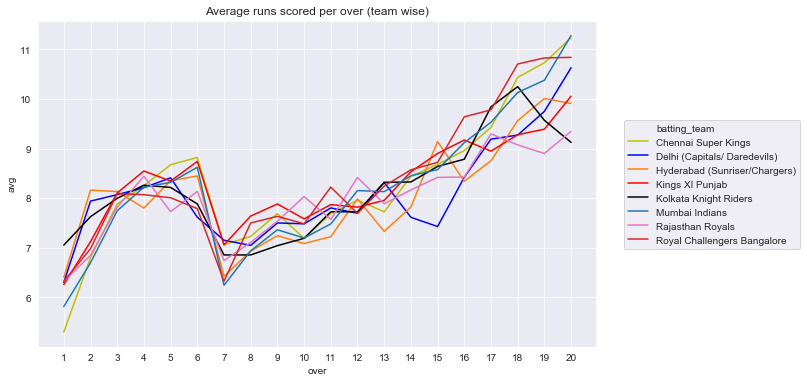

In [477]:
# Average runs scored per over team wise
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))

temp= over_runs.query('batting_team !="Kochi Tuskers Kerala" & batting_team != "Pune (Supergiant/ Warriors)" & \
batting_team !="Gujarat Lions"')
sns.lineplot(x='over', y='avg', data=temp, hue='batting_team', palette=color_code)
plt.xticks(np.arange(1,21))
plt.legend(loc=(1.05,0.3))
plt.title('Average runs scored per over (team wise)')
plt.show()

### Winning percent team and inning wise

In [401]:
# Grouping the wins for teams batting first and second
temp = match.groupby(by=['winner','team1']).count()['id'].reset_index().query('winner==team1')[['winner','id']]
temp2 = match.groupby(by=['winner','team2']).count()['id'].reset_index().query('winner==team2')[['winner','id']]
temp3= pd.DataFrame([match.team1.value_counts(),match.team2.value_counts()],).transpose().reset_index()

team_stat= pd.merge(temp, temp2, on='winner', how='inner')
team_stat= pd.merge(team_stat, temp3, left_on='winner',right_on='index', how='inner')

team_stat.rename(columns={'id_x':'batting_first','id_y':'batting_second'}, inplace= True)
team_stat.drop(columns=['index'], inplace= True)

In [404]:
# finding win percent inning wise
team_stat['win_percent_first']= team_stat['batting_first']/ team_stat['team1']
team_stat['win_percent_second']= team_stat['batting_second']/ team_stat['team2']

In [414]:
# Aggregating the win percent
team_stat['win_percent']=(team_stat.batting_first+ team_stat.batting_second)/ (team_stat.team1+ team_stat.team2)

In [426]:
# Sorting the values
team_stat.sort_values(by='win_percent', inplace=True, ascending=False)

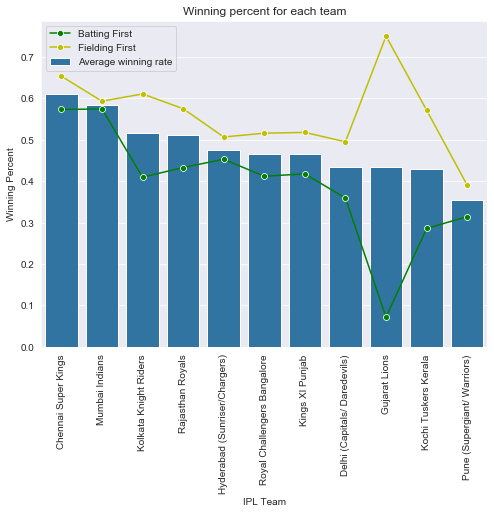

In [539]:
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')

sns.lineplot(x= 'winner', y= 'win_percent_first',data=team_stat, color='g',label='Batting First', sort= False, marker='o' )
sns.lineplot(x= 'winner', y= 'win_percent_second', data=team_stat, color='y', label= 'Fielding First',sort=False,marker='o')
sns.barplot(x='winner', y= 'win_percent',data=team_stat,  color='tab:blue', label='Average winning rate')

plt.xticks(rotation=90)
plt.xlabel('IPL Team')
plt.ylabel('Winning Percent')
plt.title('Winning percent for each team')
plt.legend()
plt.show()

### Cliffhanger matches
We need to see how many matches were decided in the last over to see if they were cliffhanger matches. 

To see this we will find how many times Team 2 won the match after the 20.3th over and how many times Team 1 won by less than 6 runs (maximum runs that can be scored on a ball).

In [493]:
# Finding matches where Team 1 won by less than 6 runs or Team 2 won in last 3 balls
cliff= match.query('(win_by_runs <6 & win_by_runs >0) | (overs_2 > 20.3 & win_by_wickets >0)')

In [498]:
cliff.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,win_by_wickets,player_of_match,venue,match_id,runs_1,runs_2,overs_1,overs_2,wickets_1,wickets_2
1,2,2017,Pune,2017-04-06,Mumbai Indians,Pune (Supergiant/ Warriors),Pune (Supergiant/ Warriors),field,normal,0,...,7,SPD Smith,Maharashtra Cricket Association Stadium,2.0,184.0,187.0,20.7,20.5,8.0,3.0
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,...,4,N Rana,Wankhede Stadium,7.0,178.0,180.0,20.8,20.5,7.0,6.0


In [504]:
# Grouping the wins for teams batting first and second
temp = cliff.groupby(by=['winner','team1']).count()['id'].reset_index().query('winner==team1')[['winner','id']]
temp2 = cliff.groupby(by=['winner','team2']).count()['id'].reset_index().query('winner==team2')[['winner','id']]
temp3= pd.DataFrame([cliff.team1.value_counts(),cliff.team2.value_counts()],).transpose().reset_index()

team_stat2= pd.merge(temp, temp2, on='winner', how='inner')
team_stat2= pd.merge(team_stat2, temp3, left_on='winner',right_on='index', how='inner')

team_stat2.rename(columns={'id_x':'batting_first','id_y':'batting_second'}, inplace= True)
team_stat2.drop(columns=['index'], inplace= True)

# finding win percent inning wise
team_stat2['win_percent_first']= team_stat2['batting_first']/ team_stat2['team1']
team_stat2['win_percent_second']= team_stat2['batting_second']/ team_stat2['team2']

# Aggregating the win percent
team_stat2['win_percent']=(team_stat2.batting_first+ team_stat2.batting_second)/ (team_stat2.team1+ team_stat2.team2)

In [510]:
team_stat2['total_wins']= team_stat2.batting_first + team_stat2.batting_second

# Sorting the values
team_stat2.sort_values(by='total_wins', inplace=True, ascending=False)
team_stat2.head()

,winner,batting_first,batting_second,team1,team2,win_percent_first,win_percent_second,win_percent,total_wins
0,Chennai Super Kings,4,21,15,24,0.266667,0.875000,0.641026,25
6,Mumbai Indians,7,13,17,18,0.411765,0.722222,0.571429,20
8,Rajasthan Royals,3,12,8,15,0.375000,0.800000,0.652174,15
4,Kings XI Punjab,7,7,19,12,0.368421,0.583333,0.451613,14
5,Kolkata Knight Riders,2,10,12,15,0.166667,0.666667,0.444444,12


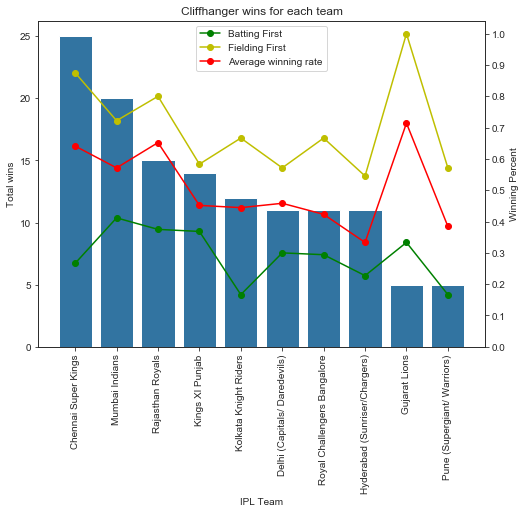

In [536]:
plt.figure(figsize=(8,6))
sns.set_style('ticks')

sns.barplot(team_stat2.winner, team_stat2.total_wins ,label='Total wins', color='tab:blue')
plt.xticks(rotation=90)
plt.xlabel('IPL Team')
plt.ylabel('Total wins')

axes2= plt.twinx()
axes2.plot(team_stat2.winner,team_stat2.win_percent_first ,'g-o',label='Batting First')
axes2.plot(team_stat2.winner,team_stat2.win_percent_second ,'y-o',label='Fielding First')
axes2.plot(team_stat2.winner,team_stat2.win_percent ,'r-o',label='Average winning rate')

plt.ylabel('Winning Percent')
plt.yticks(np.arange(0,1.1,0.1) )
plt.title('Cliffhanger wins for each team')
plt.legend(loc=9 )
plt.show()

In [532]:
team_stat2

,winner,batting_first,batting_second,team1,team2,win_percent_first,win_percent_second,win_percent,total_wins
0,Chennai Super Kings,4,21,15,24,0.266667,0.875000,0.641026,25
6,Mumbai Indians,7,13,17,18,0.411765,0.722222,0.571429,20
8,Rajasthan Royals,3,12,8,15,0.375000,0.800000,0.652174,15
4,Kings XI Punjab,7,7,19,12,0.368421,0.583333,0.451613,14
5,Kolkata Knight Riders,2,10,12,15,0.166667,0.666667,0.444444,12
1,Delhi (Capitals/ Daredevils),3,8,10,14,0.300000,0.571429,0.458333,11
9,Royal Challengers Bangalore,5,6,17,9,0.294118,0.666667,0.423077,11
3,Hyderabad (Sunriser/Chargers),5,6,22,11,0.227273,0.545455,0.333333,11
2,Gujarat Lions,1,4,3,4,0.333333,1.000000,0.714286,5
7,Pune (Supergiant/ Warriors),1,4,6,7,0.166667,0.571429,0.384615,5


### Distribution of wins
We will next see the distribution of wins for the teams batting first and second.

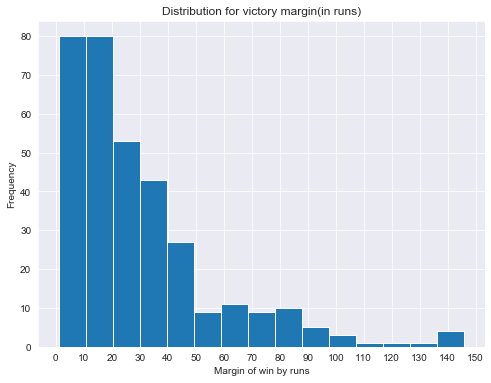

In [568]:
# Distribution for team batting first
temp= match.query('win_by_runs!=0')

plt.figure(figsize=(8,6))
plt.hist(temp.win_by_runs, bins=15)
plt.xticks(np.arange(0,160,10))
plt.xlabel('Margin of win by runs')
plt.ylabel('Frequency')
plt.title('Distribution for victory margin(in runs)')
plt.show()

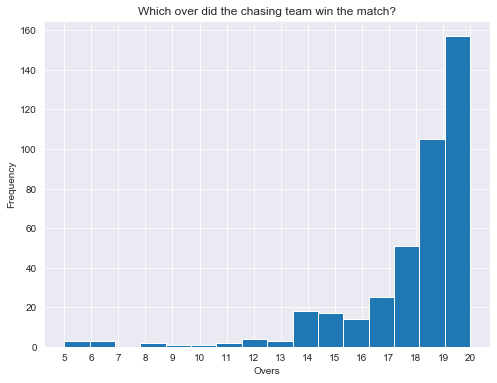

In [612]:
# Distribution for team batting second
temp = match.query('win_by_wickets>0').overs_2.apply(lambda x: int(x))

plt.figure(figsize=(8,6))
plt.hist(temp, bins= 16  )
plt.xticks(np.arange(5,21,1))
plt.xlabel('Overs')
plt.ylabel('Frequency')
plt.title('Which over did the chasing team win the match?')
plt.show()